In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from networks.cnn_v2 import CNNv2

sampling_rate = 100
dataset_path = "ecg_dataset/"
number_of_classes = 5

model = model_config = CNNv2(num_classes=number_of_classes, sampling_rate=sampling_rate)

In [3]:
from scripts.data_preparation import get_data_ready_for_training

(
    X_train,
    X_val,
    X_test,
    y_train,
    y_val,
    y_test,
    multi_label_binarizer,
) = get_data_ready_for_training(
    dataset_path=dataset_path,
    sampling_rate=model_config.sampling_rate(),
    scale_features=True,
    input_3D=model_config.need_3D_input(),
)

Loaded labels
Loaded ECG signals
Encoded labels
Scaled ECG signals
Reshaped ECG signals to: (1000, 12, 1)
Split training data into training|validation


In [4]:
from tensorflow import keras

model = keras.models.load_model(f"saved_models/{model_config.model_name()}")

In [5]:
model_config.model_name()

'cnn_v2'

In [6]:
y_pred_proba = model.predict(X_test)

68/68 [==============================] - 10s 94ms/step


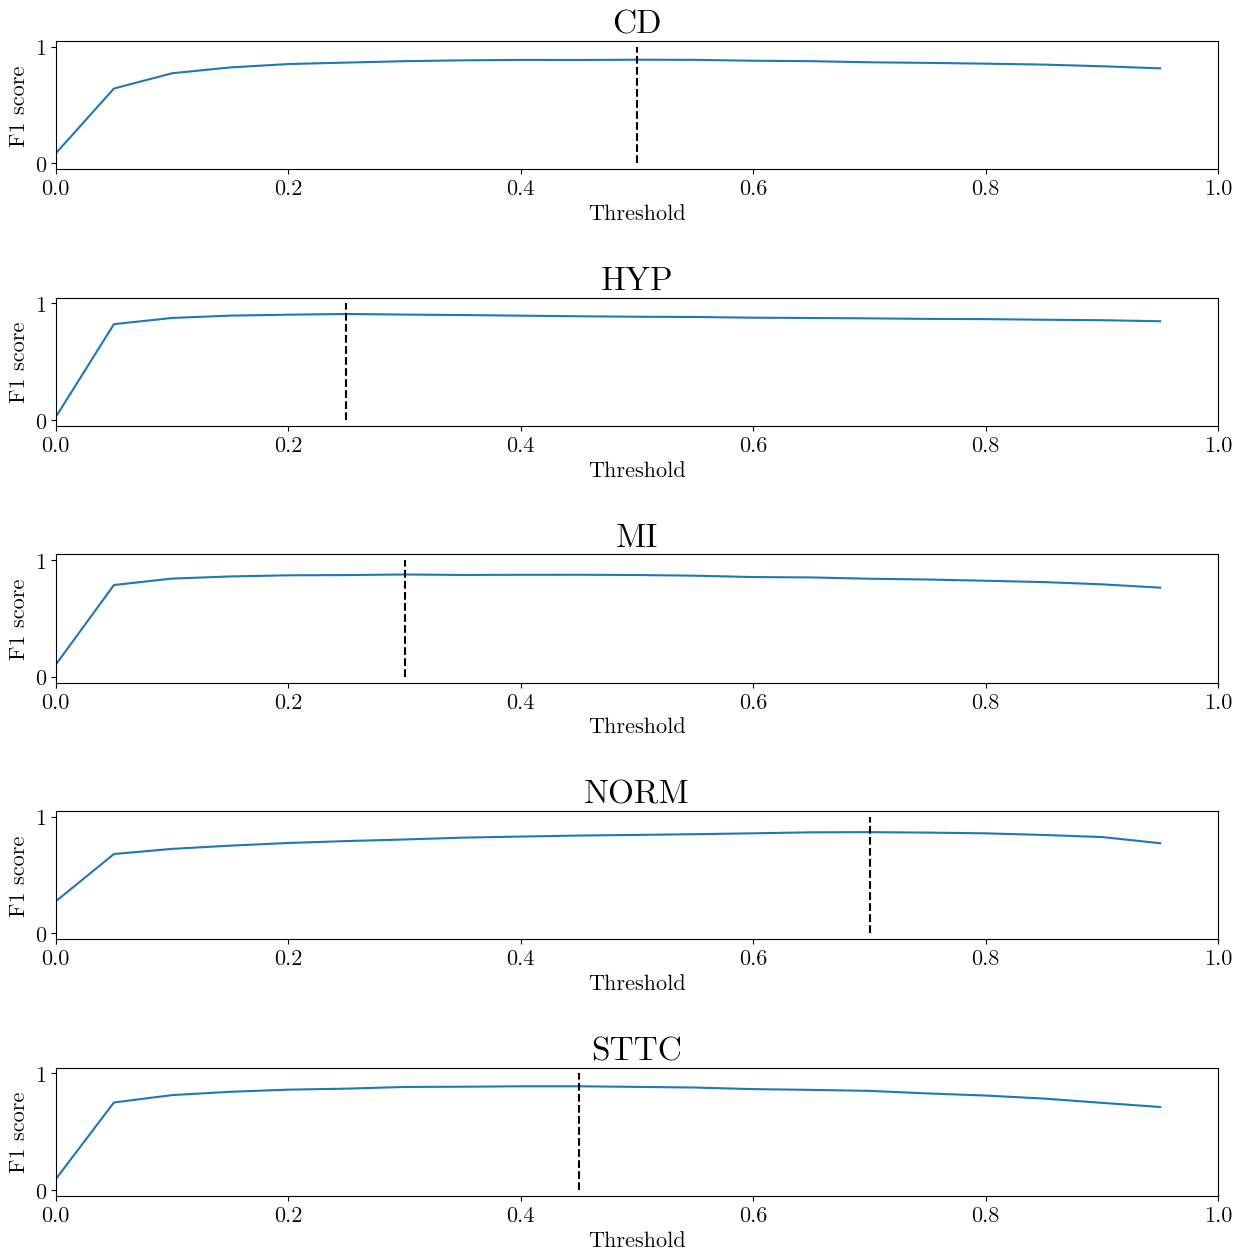

In [7]:
from scripts.data_evaluation import plot_optimal_thresholds

optimal_thresholds = plot_optimal_thresholds(
    y_test, y_pred_proba, directory_name=model_config.model_name(), save_plot=True
)

In [8]:
from scripts.data_preparation import get_data_ready_for_training

sampling_rate = 100
dataset_path = "ecg_dataset/"

(
    X_train_no_scaling,
    X_val_no_scaling,
    X_test_no_scaling,
    y_train_no_scaling,
    y_val_no_scaling,
    y_test_no_scaling,
    multi_label_binarizer_no_scaling,
) = get_data_ready_for_training(dataset_path=dataset_path, sampling_rate=sampling_rate)

Loaded labels
Loaded ECG signals
Encoded labels
Split training data into training|validation


In [9]:
y_test[:30]

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [10]:
y_test_no_scaling[:30]

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [11]:
(y_pred_proba[:30] > optimal_thresholds) * 1

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

1/12
2/12
3/12
4/12
5/12
6/12
7/12
8/12
9/12
10/12
11/12
12/12


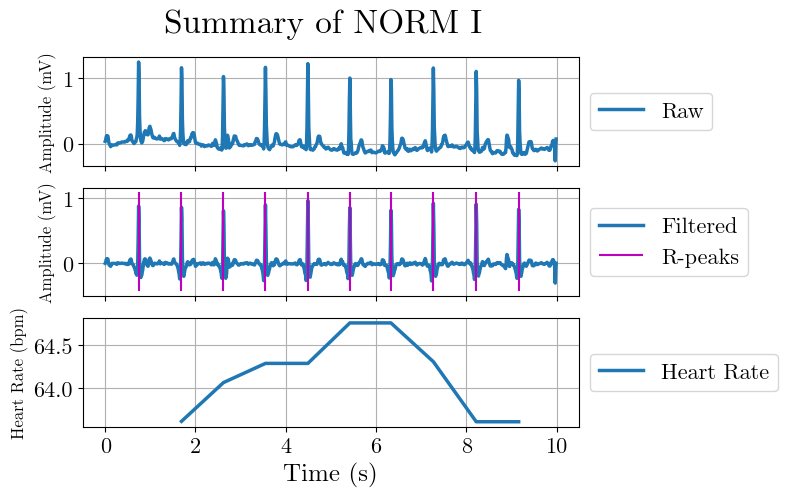

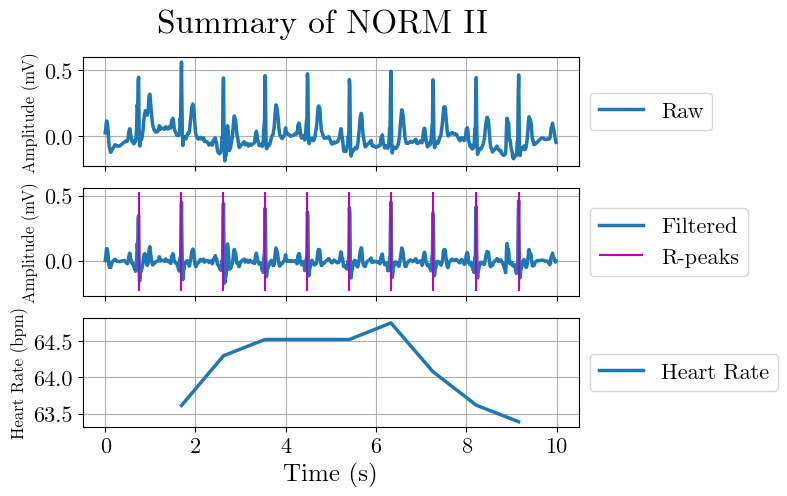

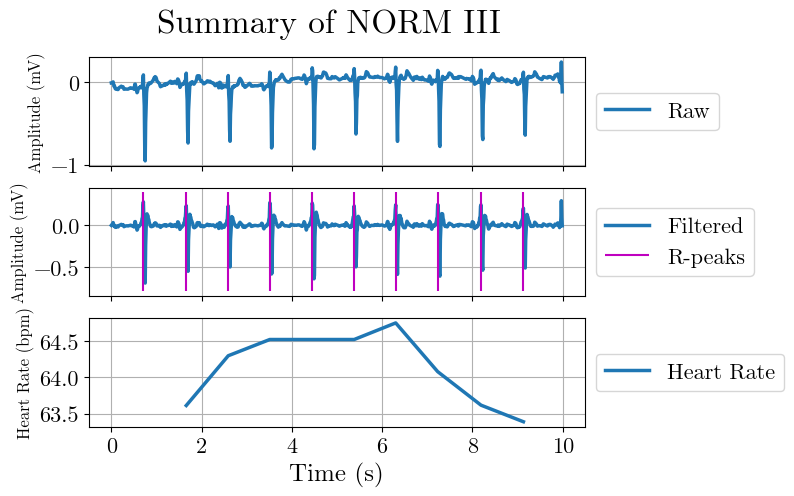

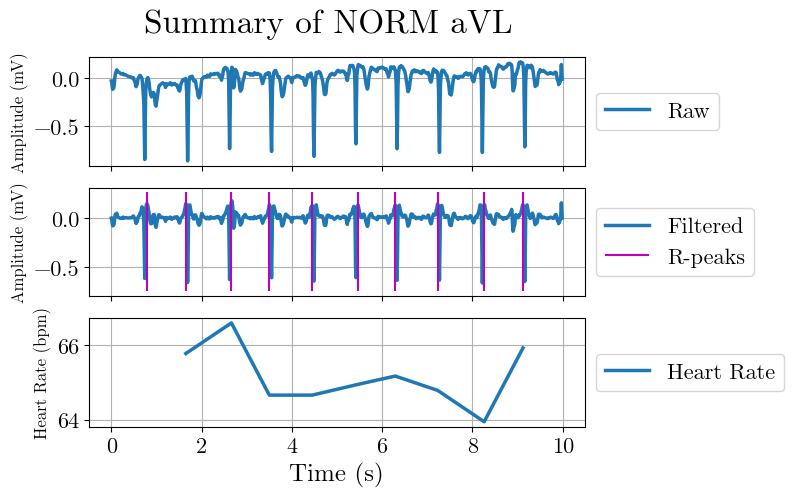

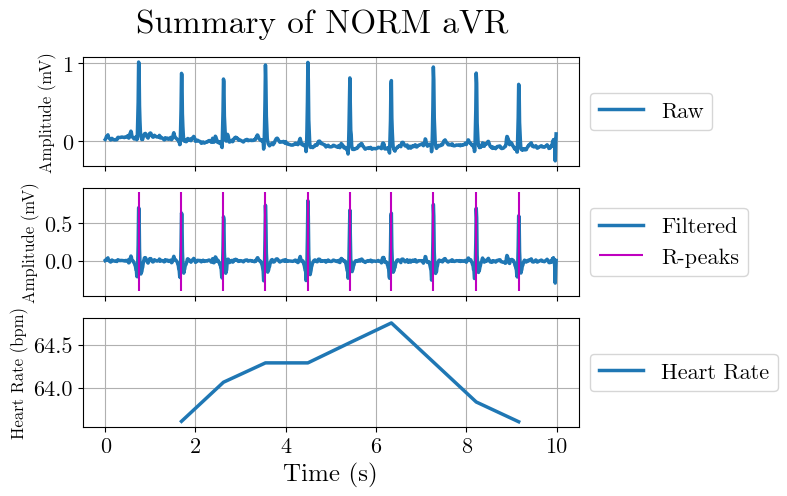

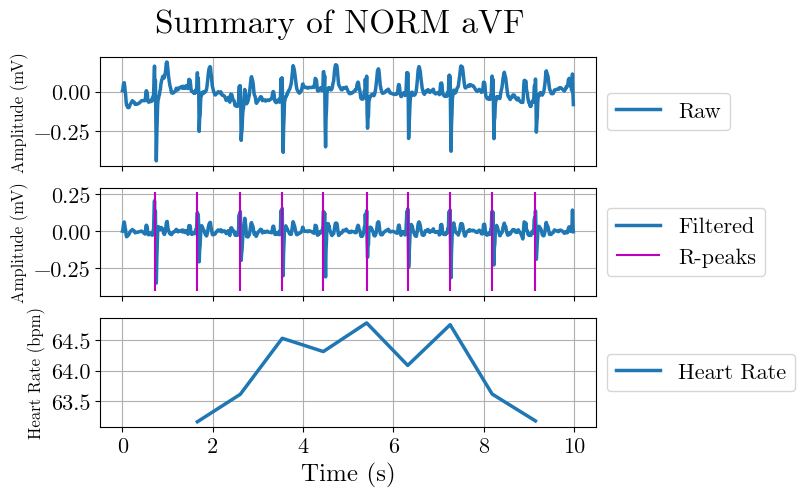

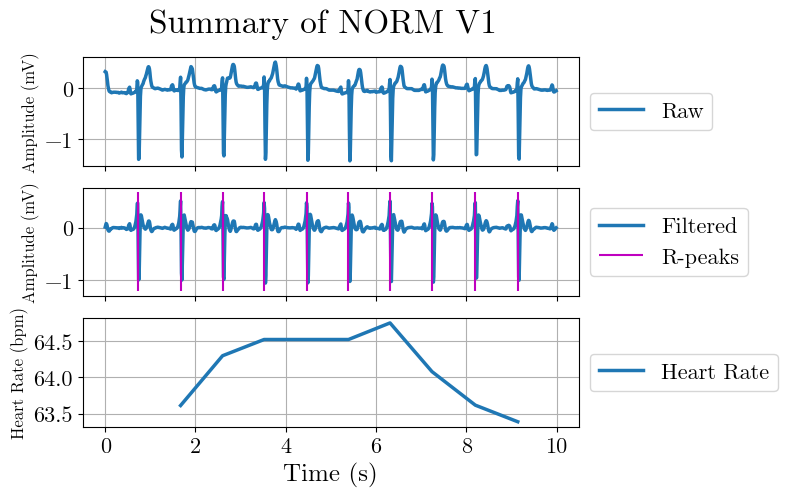

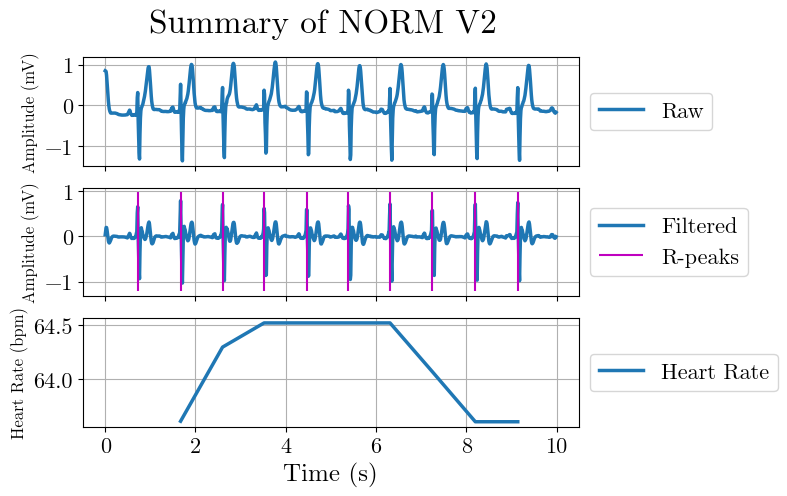

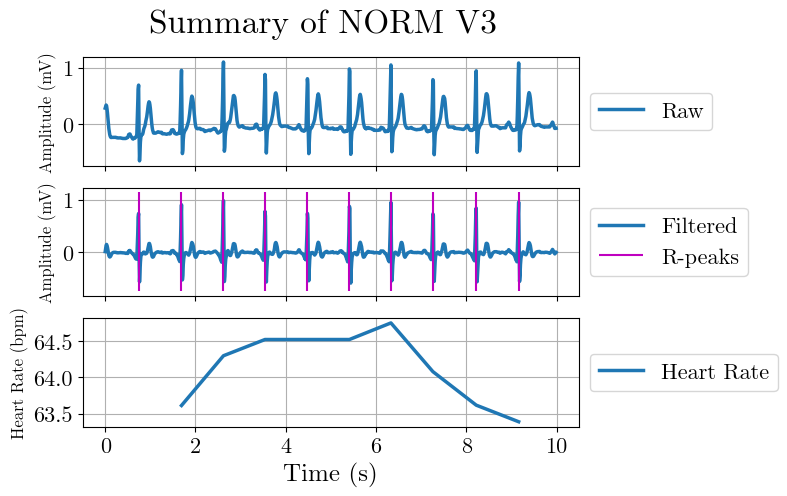

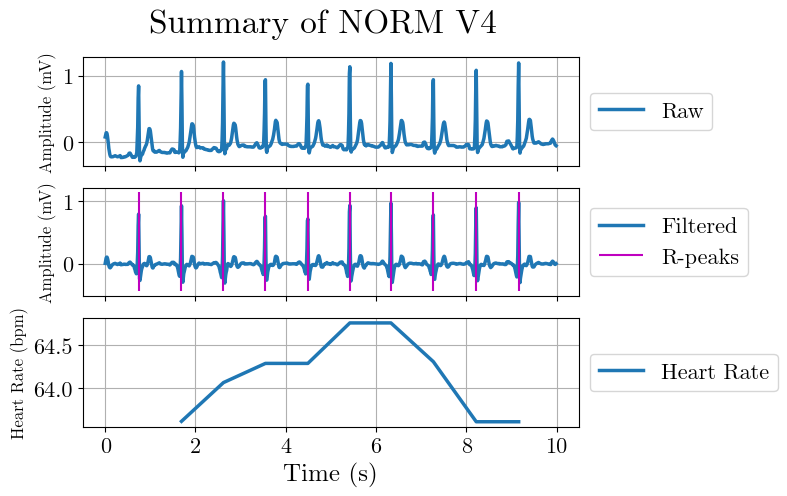

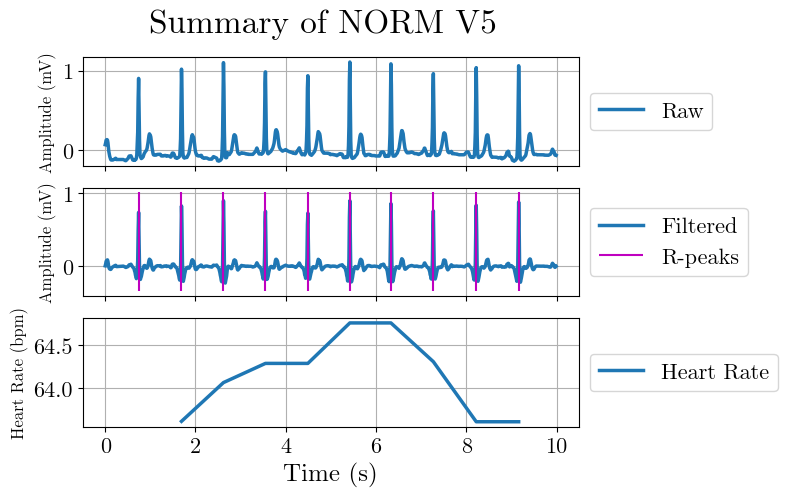

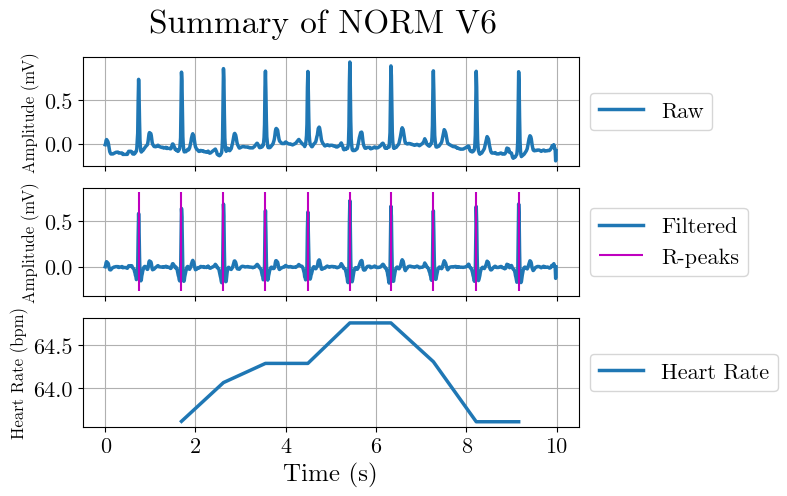

In [17]:
from biosppy.signals import ecg
from scripts.ecg_visualization_biosspy import generate_ecg_plots

leads = ["I", "II", "III", "aVL", "aVR", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
index = 0
number_of_patients = 1
total_number_of_images = number_of_patients * len(leads)

patient_number = 2

for lead_number, lead_name in enumerate(leads):
    patient_lead_data = X_test_no_scaling[patient_number, :, lead_number]
    (
        ts_axis_reference,
        filtered_ecg_signal,
        r_peaks,
        templates_ts,
        templates,
        heart_rate_ts,
        heart_rate,
    ) = ecg.ecg(
        signal=patient_lead_data, sampling_rate=100, show=False, interactive=False
    )

    generate_ecg_plots(
        ts=ts_axis_reference,
        raw=patient_lead_data,
        filtered=filtered_ecg_signal,
        rpeaks=r_peaks,
        templates_ts=templates_ts,
        templates=templates,
        heart_rate_ts=heart_rate_ts,
        heart_rate=heart_rate,
        diagnostic="NORM",  # set manually as function was only used to present one diagnostic
        lead=lead_name,
        save_plot=True,
    )
    index += 1
    print(f"{index}/{total_number_of_images}")

In [20]:
len(X_train)

14427

In [21]:
len(X_val)

4810

In [22]:
len(X_test)

2159